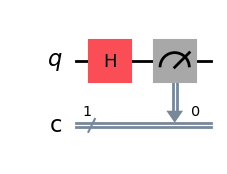

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw("mpl")

In [4]:
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeFez

In [5]:
backend = FakeFez()
qc_t = transpile(qc, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_t], shots=1024)
result = job.result()

In [6]:
pub_result = result[0]
reg_name = list(pub_result.data.keys())[0]
bit_array = pub_result.data[reg_name]

counts = bit_array.get_counts()
print("Counts:", counts)

Counts: {'1': 522, '0': 502}
